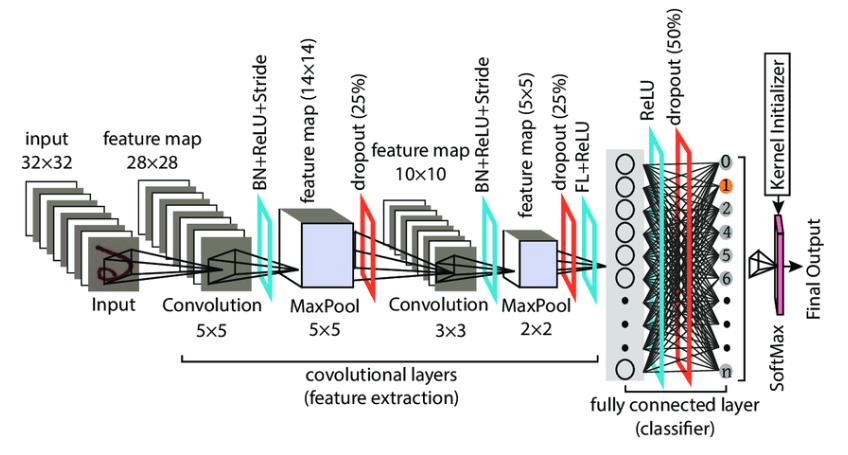

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils import data
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay

In [5]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])



training=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
trainingload=torch.utils.data.DataLoader(training,batch_size=4,shuffle=True,num_workers=2)

test=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)
testload=torch.utils.data.DataLoader(test,batch_size=4,shuffle=False,num_workers=2)

classes=('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:10<00:00, 16005374.87it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [17]:
class model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,6,5)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,16,5)
    self.fc1=nn.Linear(400,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)

  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=torch.flatten(x,1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [18]:
model0=model()

In [19]:
lossfn=nn.CrossEntropyLoss()
optims=optim.Adam(model0.parameters(),lr=0.0001)

In [21]:
for epoch in range(2):
  total_loss=0.0
  for i,data in enumerate(trainingload,0):
    inputs,labels=data
    optims.zero_grad()
    outputs=model0(inputs)
    loss=lossfn(outputs,labels)
    loss.backward()
    optims.step()

    total_loss+=loss.item()
    if i%1000==999:
      print(f'Epoch No : {epoch+1} | Batch No : {i+1} | Loss : {total_loss/1000:.4f}')
      total_loss=0.0

Epoch No : 1 | Batch No : 1000 | Loss : 1.8188
Epoch No : 1 | Batch No : 2000 | Loss : 1.7573
Epoch No : 1 | Batch No : 3000 | Loss : 1.7274
Epoch No : 1 | Batch No : 4000 | Loss : 1.6659
Epoch No : 1 | Batch No : 5000 | Loss : 1.6507
Epoch No : 1 | Batch No : 6000 | Loss : 1.6324
Epoch No : 1 | Batch No : 7000 | Loss : 1.6459
Epoch No : 1 | Batch No : 8000 | Loss : 1.5844
Epoch No : 1 | Batch No : 9000 | Loss : 1.6035
Epoch No : 1 | Batch No : 10000 | Loss : 1.5944
Epoch No : 1 | Batch No : 11000 | Loss : 1.5623
Epoch No : 1 | Batch No : 12000 | Loss : 1.5217
Epoch No : 2 | Batch No : 1000 | Loss : 1.5187
Epoch No : 2 | Batch No : 2000 | Loss : 1.5143
Epoch No : 2 | Batch No : 3000 | Loss : 1.5327
Epoch No : 2 | Batch No : 4000 | Loss : 1.4867
Epoch No : 2 | Batch No : 5000 | Loss : 1.4895
Epoch No : 2 | Batch No : 6000 | Loss : 1.4652
Epoch No : 2 | Batch No : 7000 | Loss : 1.4669
Epoch No : 2 | Batch No : 8000 | Loss : 1.4621
Epoch No : 2 | Batch No : 9000 | Loss : 1.4622
Epoch No :